In [3]:
!python -m pip install --upgrade pip setuptools wheel



     ---------------------------------------- 1.8/1.8 MB 10.1 MB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 9.5 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 65.5.0
    Uninstalling setuptools-65.5.0:
      Successfully uninstalled setuptools-65.5.0
  Attempting uninstall: pip
    Found existing installation: pip 22.3.1
    Uninstalling pip-22.3.1:
      Successfully uninstalled pip-22.3.1


In [ ]:
%pip install numpy pandas scipy librosa matplotlib tensorflow emd

Note: you may need to restart the kernel to use updated packages.


In [6]:
import os
import numpy as np
import pandas as pd
from scipy.io import loadmat
import librosa
import librosa.display
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split


In [7]:
SR = 44100 #Samplerate
DATA_DIR = "data/Datasets 1- Data acquisition using the stethoscope"

In [8]:
data = []
c11 = loadmat(DATA_DIR+"/Case 1 - Inner race fault/First speed - 648 rpm.mat")
c12 = loadmat(DATA_DIR+"/Case 1 - Inner race fault/Second speed - 1236rpm.mat")
c13 = loadmat(DATA_DIR+"/Case 1 - Inner race fault/Third speed - 1812rpm.mat")

c21 = loadmat(DATA_DIR+"/Case 2 - Outer race fault/First speed - 642 rpm.mat")
c22 = loadmat(DATA_DIR+"/Case 2 - Outer race fault/Second speed - 1236 rpm.mat")
c23 = loadmat(DATA_DIR+"/Case 2 - Outer race fault/Third speed - 1809 rpm.mat")

c31 = loadmat(DATA_DIR+"/Case 3 - Ball fault/First speed - 636 rpm.mat")
c32 = loadmat(DATA_DIR+"/Case 3 - Ball fault/Second speed - 1230 rpm.mat")
c33 = loadmat(DATA_DIR+"/Case 3 - Ball fault/Third speed - 1812 rpm.mat")

c41 = loadmat(DATA_DIR+"/Case 4 - Healthy bearing/First speed - 636 rpm.mat")
c42 = loadmat(DATA_DIR+"/Case 4 - Healthy bearing/Second speed - 1230 rpm.mat")
c43 = loadmat(DATA_DIR+"/Case 4 - Healthy bearing/Third speed - 1812 rpm.mat")

c51 = loadmat(DATA_DIR+"/Case 5 - Looseness fault/6-Looseness-600rpm.mat")
c52 = loadmat(DATA_DIR+"/Case 5 - Looseness fault/6-Looseness-1200rpm.mat")
c53 = loadmat(DATA_DIR+"/Case 5 - Looseness fault/6-Looseness-1800rpm.mat")

c61 = loadmat(DATA_DIR+"/Case 6 - Combined faults (Inner, outer, ball)/6-Combined-600rpm.mat")
c62 = loadmat(DATA_DIR+"/Case 6 - Combined faults (Inner, outer, ball)/6-Combined-1200rpm.mat")
c63 = loadmat(DATA_DIR+"/Case 6 - Combined faults (Inner, outer, ball)/6-Combined-1800rpm.mat")


In [9]:
data_list = [
    {"label": "Inner race fault", "rpm": 648, "data": c11["x"].flatten()},
    {"label": "Inner race fault", "rpm": 1236, "data": c12["x"].flatten()},
    {"label": "Inner race fault", "rpm": 1812, "data": c13["x"].flatten()},
    {"label": "Outer race fault", "rpm": 642, "data": c21["x"].flatten()},
    {"label": "Outer race fault", "rpm": 1236, "data": c22["x"].flatten()},
    {"label": "Outer race fault", "rpm": 1809, "data": c23["x"].flatten()},
    {"label": "Ball fault", "rpm": 636, "data": c31["x"].flatten()},
    {"label": "Ball fault", "rpm": 1230, "data": c32["x"].flatten()},
    {"label": "Ball fault", "rpm": 1812, "data": c33["x"].flatten()},
    {"label": "Healthy", "rpm": 636, "data": c41["x"].flatten()},
    {"label": "Healthy", "rpm": 1230, "data": c42["x"].flatten()},
    {"label": "Healthy", "rpm": 1812, "data": c43["x"].flatten()},
    {"label": "Looseness fault", "rpm": 600, "data": c51["x"].flatten()},
    {"label": "Looseness fault", "rpm": 1200, "data": c52["x"].flatten()},
    {"label": "Looseness fault", "rpm": 1800, "data": c53["x"].flatten()},
    {"label": "Combined faults", "rpm": 600, "data": c61["x"].flatten()},
    {"label": "Combined faults", "rpm": 1200, "data": c62["x"].flatten()},
    {"label": "Combined faults", "rpm": 1800, "data": c63["x"].flatten()},
]

df = pd.DataFrame(data_list)
df

,label,rpm,data
0,Inner race fault,648,"[0.08636474609375, 0.083038330078125, 0.075958..."
1,Inner race fault,1236,"[0.174530029296875, 0.188262939453125, 0.19223..."
2,Inner race fault,1812,"[0.1209716796875, 0.128936767578125, 0.1336364..."
3,Outer race fault,642,"[-0.0635986328125, -0.05096435546875, -0.03335..."
4,Outer race fault,1236,"[0.091400146484375, 0.04150390625, -0.02258300..."
5,Outer race fault,1809,"[-0.163360595703125, -0.189208984375, -0.19415..."
6,Ball fault,636,"[0.03448486328125, 0.003753662109375, 0.043609..."
7,Ball fault,1230,"[-0.36395263671875, -0.34356689453125, -0.3076..."
8,Ball fault,1812,"[0.006011962890625, 0.005584716796875, 0.00485..."
9,Healthy,636,"[-0.00146484375, -0.0048828125, -0.0029296875,..."


# Rohdaten vs Mel-Spektogramm

NameError: name 'samples_df' is not defined

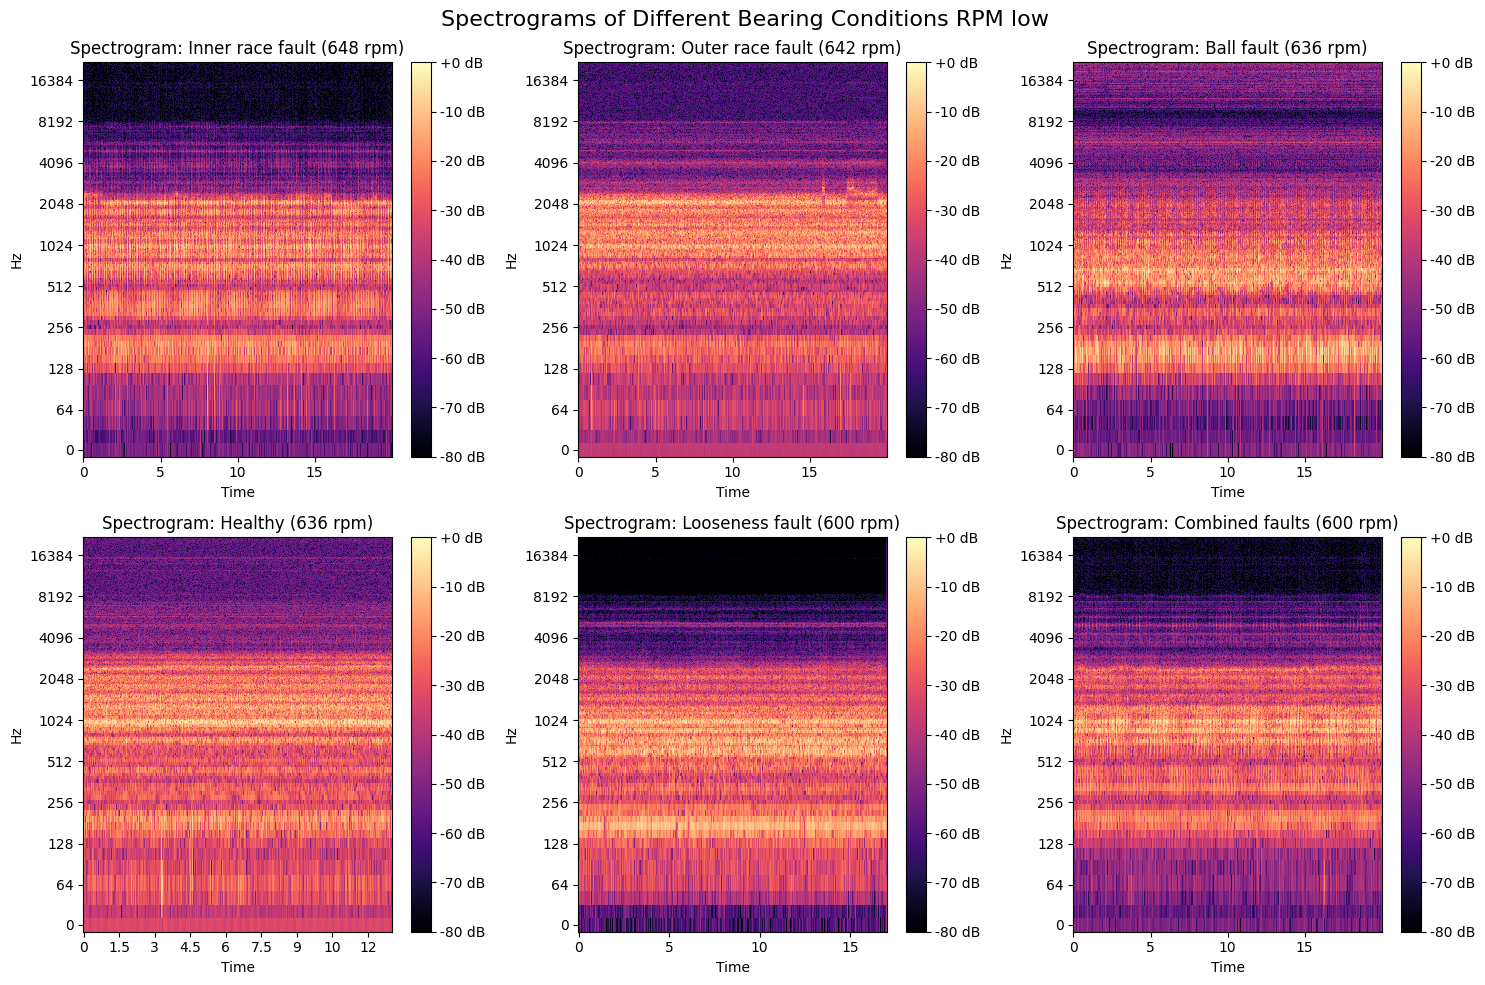

In [12]:

n = len(df)
cols = 3
rows = 2
fig, axes = plt.subplots(rows, cols, figsize=(15, 5*rows))
fig.suptitle("Spectrograms of Different Bearing Conditions RPM low", fontsize=16)
axes = axes.flatten()
for idx, i in enumerate(range(0, n, 3)):
    signal = df.iloc[i]["data"]
    S = np.abs(librosa.stft(signal, n_fft=2048, hop_length=512))
    S_db = librosa.amplitude_to_db(S, ref=np.max)

    ax = axes[idx]
    img = librosa.display.specshow(S_db, sr=SR, x_axis="time", y_axis="log", ax=ax)
    ax.set_title(f"Spectrogram: {df.iloc[i]['label']} ({df.iloc[i]['rpm']} rpm)")
    fig.colorbar(img, ax=ax, format="%+2.0f dB")


plt.tight_layout()
plt.show()


In [13]:
def split_into_samples(signal, sr, sample_length_sec=1):
    sample_size = int( sr * sample_length_sec)
    num_samples = len(signal) // sample_size
    samples = np.array_split(signal[:num_samples * sample_size], num_samples)
    return samples

In [14]:
samples_list = []

for idx, row in df.iterrows():
    samples = split_into_samples(row["data"], SR, sample_length_sec=1)
    for sample in samples:
        samples_list.append({
            "label": row["label"],
            "rpm": row["rpm"],
            "data": sample
        })

samples_df = pd.DataFrame(samples_list)
samples_df

,label,rpm,data
0,Inner race fault,648,"[0.08636474609375, 0.083038330078125, 0.075958..."
1,Inner race fault,648,"[0.02606201171875, 0.020782470703125, 0.015716..."
2,Inner race fault,648,"[-0.1424560546875, -0.138153076171875, -0.1298..."
3,Inner race fault,648,"[-0.293212890625, -0.212646484375, -0.12133789..."
4,Inner race fault,648,"[0.0809326171875, 0.071929931640625, 0.0579223..."
...,...,...,...
325,Combined faults,1800,"[0.059722900390625, 0.079437255859375, 0.09948..."
326,Combined faults,1800,"[-0.018463134765625, 0.040802001953125, 0.0914..."
327,Combined faults,1800,"[0.03057861328125, 0.03887939453125, 0.0432434..."
328,Combined faults,1800,"[-0.2213134765625, -0.212249755859375, -0.1858..."


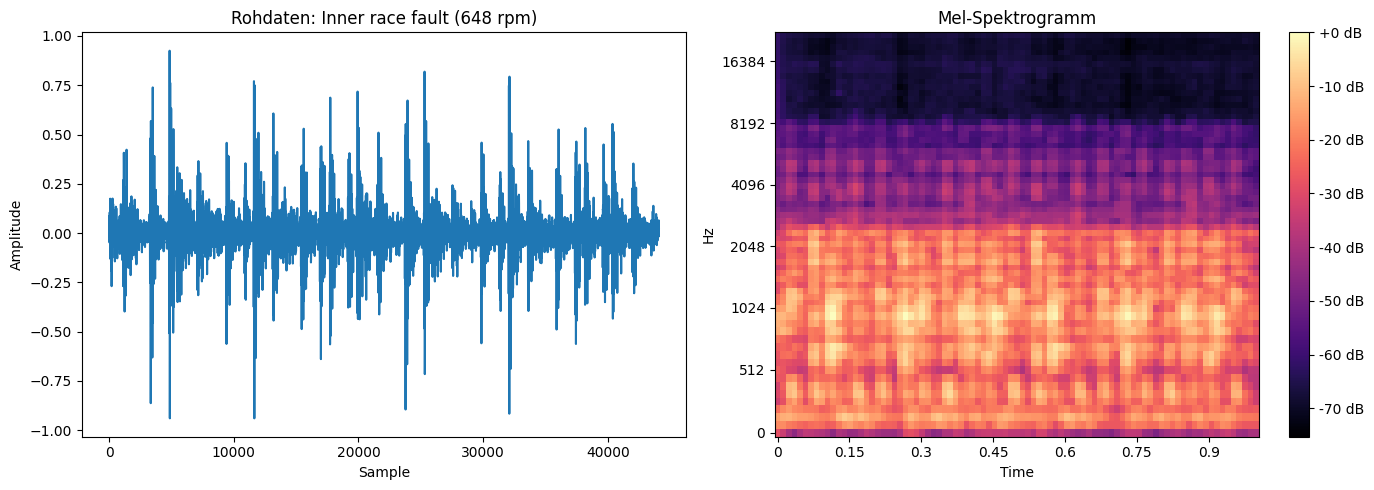

In [15]:
# Beispiel: Zeige Rohdaten und Mel-Spektrogramm für ein Sample nebeneinander

idx = 0  # Index des Samples, z.B. erstes Sample

signal = samples_df.iloc[idx]["data"]

# Mel-Spektrogramm berechnen
n_mels = 64
mel = librosa.feature.melspectrogram(y=signal, sr=SR, n_mels=n_mels)
mel_db = librosa.power_to_db(mel, ref=np.max)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Rohdaten (Zeitreihe)
axes[0].plot(signal)
axes[0].set_title(f"Rohdaten: {samples_df.iloc[idx]['label']} ({samples_df.iloc[idx]['rpm']} rpm)")
axes[0].set_xlabel("Sample")
axes[0].set_ylabel("Amplitude")

# Mel-Spektrogramm
img = librosa.display.specshow(mel_db, sr=SR, x_axis="time", y_axis="mel", ax=axes[1])
axes[1].set_title("Mel-Spektrogramm")
fig.colorbar(img, ax=axes[1], format="%+2.0f dB")

plt.tight_layout()
plt.show()

# Modelle auf Rohdaten testen
Die Ergenisse fallen schlecht aus. 

In [16]:
x = np.stack(samples_df["data"].values)
y = samples_df["label"].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Decision Tree

In [17]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [18]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.2f}")

Test Accuracy: 0.20


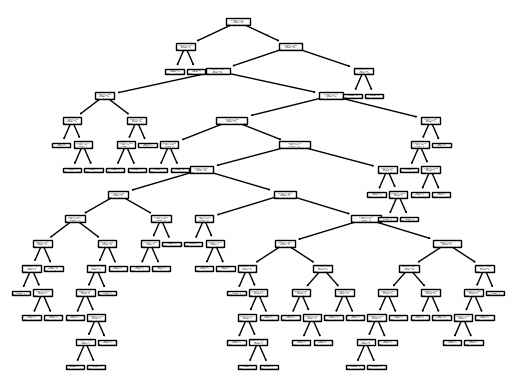

In [19]:
tree.plot_tree(clf)
plt.show()

### MLP

In [20]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(1000,), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)


,hidden_layer_sizes,"(1000,)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,500
,shuffle,True
,random_state,42


In [21]:
y_pred_mlp = mlp.predict(X_test)
acc_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"Test Accuracy MLP: {acc_mlp:.2f}")

Test Accuracy MLP: 0.27


## Mel-Spektogramm

In [22]:
# Mel-Spektrogramme für alle Samples berechnen
n_mels = 64  # Anzahl Mel-Bänder
mel_list = []

for signal in samples_df["data"].values:
    mel = librosa.feature.melspectrogram(y=signal, sr=SR, n_mels=n_mels)
    mel_db = librosa.power_to_db(mel, ref=np.max)
    mel_list.append(mel_db)

# In ein NumPy-Array umwandeln (n_samples, n_mels, time_steps)
X_mel = np.stack(mel_list)
y = samples_df["label"].values

print(f"Shape X_mel: {X_mel.shape}")  # z.B. (n_samples, 64, time_steps)

# Beispiel Split für CNN
X_train, X_test, y_train, y_test = train_test_split(X_mel, y, test_size=0.2, random_state=42)

Shape X_mel: (330, 64, 87)


In [23]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

ValueError: Found array with dim 3, while dim <= 2 is required by DecisionTreeClassifier.

In [ ]:
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.2f}")

Test Accuracy: 0.17


In [24]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

ValueError: Found array with dim 3, while dim <= 2 is required by MLPClassifier.

In [ ]:
y_pred_mlp = mlp.predict(X_test)
acc_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"Test Accuracy MLP: {acc_mlp:.2f}")

Test Accuracy MLP: 0.24


# Data Organisation

In [25]:
samples_list = []
for idx, row in df.iterrows():
    samples = split_into_samples(row["data"], SR, sample_length_sec=0.125)
    for sample in samples:
        samples_list.append({
            "label": row["label"],
            "rpm": row["rpm"],
            "data": sample
        })

samples_df = pd.DataFrame(samples_list)
samples_df

,label,rpm,data
0,Inner race fault,648,"[0.08636474609375, 0.083038330078125, 0.075958..."
1,Inner race fault,648,"[0.257354736328125, 0.254486083984375, 0.24627..."
2,Inner race fault,648,"[0.032806396484375, 0.05303955078125, 0.074188..."
3,Inner race fault,648,"[0.008880615234375, 0.000762939453125, -0.0036..."
4,Inner race fault,648,"[-0.11944580078125, -0.115234375, -0.105895996..."
...,...,...,...
2635,Combined faults,1800,"[-0.152252197265625, -0.2003173828125, -0.2446..."
2636,Combined faults,1800,"[0.047393798828125, 0.042877197265625, 0.04406..."
2637,Combined faults,1800,"[-0.02508544921875, -0.004241943359375, 0.0288..."
2638,Combined faults,1800,"[0.0330810546875, 0.09698486328125, 0.14532470..."


In [ ]:
import emd
import numpy as np
from scipy import ndimage
